In [7]:
import pandas as pd

In [8]:
import numpy as np

In [54]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [9]:
data1 = pd.read_csv("/home/raghuram/mnist-dataset/mnist_train.csv").values

In [10]:
data1

array([[0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [11]:
data2 = pd.read_csv("/home/raghuram/mnist-dataset/mnist_test.csv").values

In [12]:
data2

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
 clf=DecisionTreeClassifier()

In [72]:
xtrain = data1[0: , 1:]

In [17]:
train_label = data1[0: , 0]

In [18]:
print(train_label)

[0 4 1 ... 5 6 8]


In [73]:
xtest = data2[0: , 1:]

In [20]:
test_label = data2[0: , 0]

In [21]:
print(test_label)

[2 1 0 ... 4 5 6]


In [22]:
d=xtest[0]

In [23]:
d.shape=(28,28)

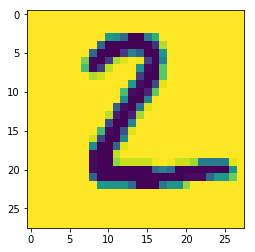

In [24]:
plt.imshow(255-d)

In [56]:
y_score=clf.fit(xtrain,train_label)

In [57]:
print(clf.predict([xtest[0]]))

[2]


In [58]:
output = clf.predict(xtest)

In [28]:
output

array([2, 1, 0, ..., 4, 5, 6])

In [29]:
count = 0
for i in range(0,6000):
    count+=1 if output[i] == test_label[i] else 0

In [30]:
count

5160

In [31]:
print("accuracy=", (count/6000)*100)

accuracy= 86.0


In [54]:
import graphviz

In [55]:
from sklearn import tree

In [74]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)   

In [75]:
graph = graphviz.Source(dot_data) 

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
nb=GaussianNB()

In [81]:
nb.fit(xtrain,train_label)

GaussianNB(priors=None)

In [82]:

nb.predict([xtest[0]])

array([2])

In [83]:
output = nb.predict(xtest)


In [84]:
count = 0
for i in range(0,6000):
    count+=1 if output[i] == test_label[i] else 0

In [85]:
print("accuracy=", (count/6000)*100)

accuracy= 53.449999999999996


In [86]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
 cle=DecisionTreeClassifier(criterion='entropy')

In [42]:
cle.fit(xtrain,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
output = cle.predict(xtest)


In [44]:
count = 0
for i in range(0,6000):
    count+=1 if output[i] == test_label[i] else 0

In [45]:
count

5226

In [46]:
print("accuracy=", (count/6000)*100)

accuracy= 87.1


In [72]:
 clr=DecisionTreeClassifier(criterion='GainRatio')

In [47]:
from sklearn.metrics import classification_report

In [48]:
from sklearn.metrics import confusion_matrix,roc_curve

In [49]:
confusion_matrix(test_label,output)

array([[ 916,    1,   10,    4,    5,   16,   11,    3,    7,    7],
       [   0, 1098,    7,    4,    3,    5,    2,    4,    9,    3],
       [   8,    5,  908,   17,   11,   14,   21,   20,   24,    4],
       [   8,   10,   24,  863,    3,   40,    6,   15,   25,   16],
       [  10,    2,   16,    6,  857,    5,   15,   10,   17,   44],
       [  16,    8,    9,   36,    4,  752,   20,    1,   24,   22],
       [  14,    3,   13,    7,   20,   16,  865,    5,   11,    4],
       [   2,   10,   32,   18,   13,    8,    1,  914,    8,   21],
       [  11,    4,   19,   32,   23,   25,   13,    8,  818,   21],
       [   9,    4,    4,   26,   31,   18,    4,   16,   28,  869]])

In [36]:
roc_curve()

TypeError: roc_curve() missing 2 required positional arguments: 'y_true' and 'y_score'

In [39]:
from sklearn.metrics import precision_recall_fscore_support

In [51]:
precision_recall_fscore_support(test_label,output)

(array([0.92152918, 0.95895197, 0.87140115, 0.85192498, 0.88350515,
        0.83648498, 0.90292276, 0.91767068, 0.84243048, 0.859545  ]),
 array([0.93469388, 0.96740088, 0.87984496, 0.85445545, 0.87270876,
        0.84304933, 0.90292276, 0.88997079, 0.83983573, 0.86124876]),
 array([0.92806484, 0.96315789, 0.8756027 , 0.85318833, 0.87807377,
        0.83975433, 0.90292276, 0.9036085 , 0.84113111, 0.86039604]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1027,  974, 1009]))

In [52]:
print(classification_report(test_label,output))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93       980
          1       0.96      0.97      0.96      1135
          2       0.87      0.88      0.88      1032
          3       0.85      0.85      0.85      1010
          4       0.88      0.87      0.88       982
          5       0.84      0.84      0.84       892
          6       0.90      0.90      0.90       958
          7       0.92      0.89      0.90      1027
          8       0.84      0.84      0.84       974
          9       0.86      0.86      0.86      1009

avg / total       0.89      0.89      0.89      9999



In [67]:
y=test_label
y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y.shape[1]

In [68]:
x=train_label
x = label_binarize(x, classes=[0, 1, 2,3,4,5,6,7,8,9])


In [75]:
clf.fit(xtrain,x)
n_output=clf.predict(xtest)

In [77]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_= roc_curve(n_output[:, i], y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(n_output.ravel(), y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

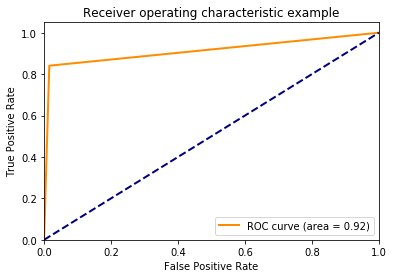

In [82]:
plt.figure()
lw = 2
plt.plot(fpr[5], tpr[5], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


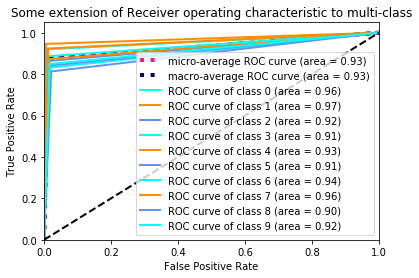

In [84]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()